In [3]:
import os,shutil
print('total training NORMAL images:', len(os.listdir('/home/irfan/Downloads/PRO/chest_xray/chest_xray/train/NORMAL')))

('total training NORMAL images:', 1342)


In [4]:
print('total training PNEUMONIA images:', len(os.listdir('/home/irfan/Downloads/PRO/chest_xray/chest_xray/train/PNEUMONIA')))

('total training PNEUMONIA images:', 3876)


In [5]:
print('total validation NORMAL images:', len(os.listdir('/home/irfan/Downloads/PRO/chest_xray/chest_xray/validation/NORMAL')))

('total validation NORMAL images:', 9)


In [6]:
print('total validation PNEUMONIA images:', len(os.listdir('/home/irfan/Downloads/PRO/chest_xray/chest_xray/validation/PNEUMONIA')))

('total validation PNEUMONIA images:', 9)


In [7]:
print('total test NORMAL images:', len(os.listdir('/home/irfan/Downloads/PRO/chest_xray/chest_xray/test/NORMAL')))

('total test NORMAL images:', 234)


In [8]:
print('total test PNEUMONIA images:', len(os.listdir('/home/irfan/Downloads/PRO/chest_xray/chest_xray/test/PNEUMONIA')))

('total test PNEUMONIA images:', 390)


In [9]:
base_dir = '/home/irfan/Downloads/PRO/chest_xray/chest_xray/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

('data batch shape:', (20, 150, 150, 3))
('labels batch shape:', (20,))


In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 145s 1s/step - loss: 0.4681 - acc: 0.7850 - val_loss: 0.8374 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 137s 1s/step - loss: 0.2446 - acc: 0.9016 - val_loss: 0.9043 - val_acc: 0.6250
Epoch 3/30
100/100 [==============================] - 132s 1s/step - loss: 0.1571 - acc: 0.9395 - val_loss: 0.8402 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 134s 1s/step - loss: 0.1364 - acc: 0.9490 - val_loss: 0.7034 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 134s 1s/step - loss: 0.1291 - acc: 0.9518 - val_loss: 0.8408 - val_acc: 0.5625
Epoch 6/30
100/100 [==============================] - 141s 1s/step - loss: 0.1119 - acc: 0.9600 - val_loss: 0.5993 - val_acc: 0.8125
Epoch 7/30
100/100 [==============================] - 136s 1s/step - loss: 0.1012 - acc: 0.9605 - val_loss: 0.5947 - val_acc: 0.7500
Epoch 8/30
100/100 [==============================] - 134s 1s/step - 

In [17]:
model.save('pneumonia.h5')

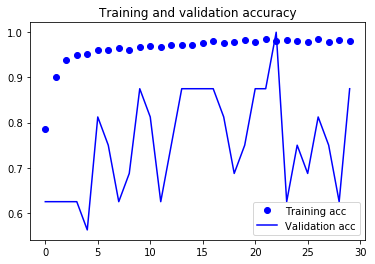

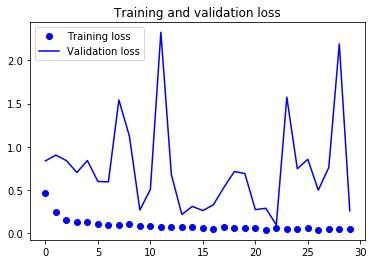

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [22]:
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')
test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

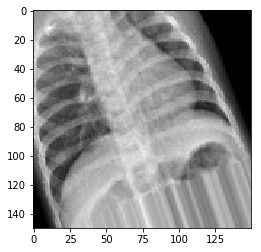

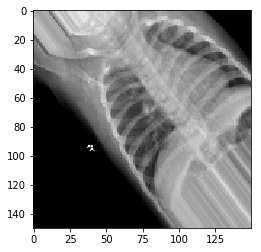

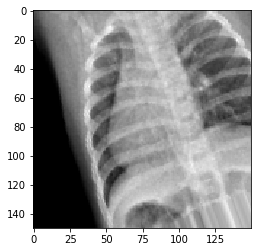

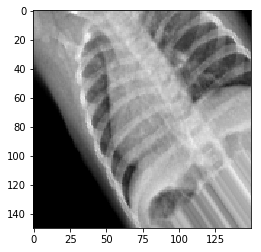

In [23]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_normal_dir, fname) for fname in os.listdir(train_normal_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 209s 2s/step - loss: 0.5517 - acc: 0.7397 - val_loss: 0.8105 - val_acc: 0.6250
Epoch 2/100
100/100 [==============================] - 215s 2s/step - loss: 0.4232 - acc: 0.8113 - val_loss: 0.5794 - val_acc: 0.6875
Epoch 3/100
100/100 [==============================] - 214s 2s/step - loss: 0.3584 - acc: 0.8447 - val_loss: 0.5975 - val_acc: 0.6875
Epoch 4/100
100/100 [==============================] - 214s 2s/step - loss: 0.3150 - acc: 0.8637 - val_loss: 1.3730 - val_acc: 0.6250
Epoch 5/100
100/100 [==============================] - 212s 2s/step - loss: 0.2922 - acc: 0.8650 - val_loss: 0.4847 - val_acc: 0.8750
Epoch 6/100
100/100 [==============================] - 215s 2s/step - loss: 0.2782 - acc: 0.8866 - val_loss: 0.6533 - val_acc: 0.6875
Epoch 7/100
100/100 [==============================] - 214s 2s/step - loss: 0.2383 - acc: 0.9078 - val_loss: 0.527

100/100 [==============================] - 213s 2s/step - loss: 0.1683 - acc: 0.9338 - val_loss: 0.6660 - val_acc: 0.5625
Epoch 62/100
100/100 [==============================] - 213s 2s/step - loss: 0.1489 - acc: 0.9481 - val_loss: 1.6506 - val_acc: 0.5625
Epoch 63/100
100/100 [==============================] - 213s 2s/step - loss: 0.1530 - acc: 0.9444 - val_loss: 1.3431 - val_acc: 0.5625
Epoch 64/100
100/100 [==============================] - 211s 2s/step - loss: 0.1474 - acc: 0.9463 - val_loss: 1.1808 - val_acc: 0.5625
Epoch 65/100
100/100 [==============================] - 211s 2s/step - loss: 0.1557 - acc: 0.9431 - val_loss: 0.6959 - val_acc: 0.5625
Epoch 66/100
100/100 [==============================] - 210s 2s/step - loss: 0.1499 - acc: 0.9459 - val_loss: 1.5292 - val_acc: 0.5625
Epoch 67/100
100/100 [==============================] - 205s 2s/step - loss: 0.1529 - acc: 0.9431 - val_loss: 1.6988 - val_acc: 0.6250
Epoch 68/100
100/100 [==============================] - 209s 2s/step

In [26]:
model.save('pneumonia2.h5')

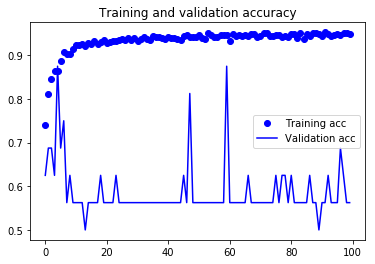

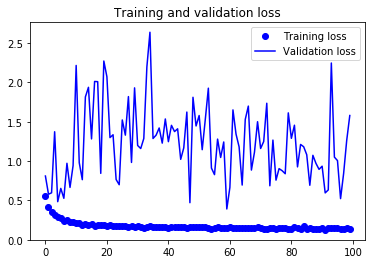

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
import keras
keras.__version__

'2.1.6'

In [29]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [30]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [34]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/irfan/Downloads/PRO/chest_xray/chest_xray'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 5216)
validation_features, validation_labels = extract_features(validation_dir, 16)
test_features, test_labels = extract_features(test_dir, 624)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [35]:
model.save('start8thnotebook.h5')

In [36]:
train_features = np.reshape(train_features, (5216, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (16, 4 * 4 * 512))
test_features = np.reshape(test_features, (624, 4 * 4 * 512))

In [37]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 5216 samples, validate on 16 samples
Epoch 1/30
5216/5216 [==============================] - 11s 2ms/step - loss: 0.3244 - acc: 0.8629 - val_loss: 0.4819 - val_acc: 0.8125
Epoch 2/30
5216/5216 [==============================] - 10s 2ms/step - loss: 0.1608 - acc: 0.9410 - val_loss: 0.4745 - val_acc: 0.8125
Epoch 3/30
5216/5216 [==============================] - 10s 2ms/step - loss: 0.1246 - acc: 0.9532 - val_loss: 0.4004 - val_acc: 0.8125
Epoch 4/30
5216/5216 [==============================] - 10s 2ms/step - loss: 0.1103 - acc: 0.9622 - val_loss: 0.4512 - val_acc: 0.8125
Epoch 5/30
5216/5216 [==============================] - 10s 2ms/step - loss: 0.0990 - acc: 0.9651 - val_loss: 0.4099 - val_acc: 0.8125
Epoch 6/30
5216/5216 [==============================] - 10s 2ms/step - loss: 0.0915 - acc: 0.9672 - val_loss: 0.3834 - val_acc: 0.8125
Epoch 7/30
5216/5216 [==============================] - 10s 2ms/step - loss: 0.0841 - acc: 0.9707 - val_loss: 0.4773 - val_acc: 0.7500
Epoch 8/3

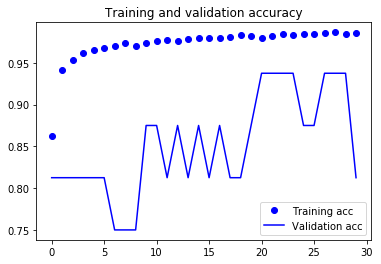

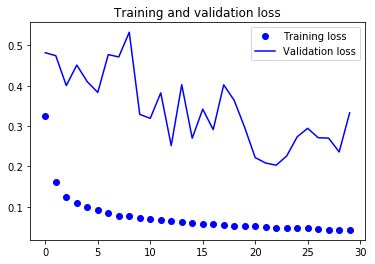

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [41]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

('This is the number of trainable weights before freezing the conv base:', 30)


In [42]:
conv_base.trainable = False

In [43]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

('This is the number of trainable weights after freezing the conv base:', 4)


In [44]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

#history = model.fit_generator(
      #train_generator,
      #steps_per_epoch=100,
      #epochs=30,
      #validation_data=validation_generator,
      #validation_steps=50,
      #verbose=2)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [45]:
model.save('beforefinetuning.h5')

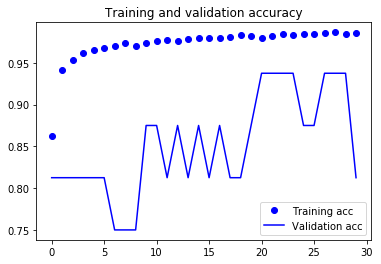

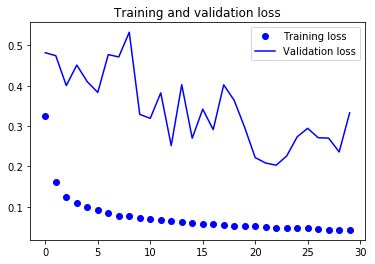

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [48]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [49]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 734s 7s/step - loss: 0.3430 - acc: 0.8429 - val_loss: 0.2643 - val_acc: 0.8125
Epoch 2/100
100/100 [==============================] - 742s 7s/step - loss: 0.2093 - acc: 0.9105 - val_loss: 0.3449 - val_acc: 0.8125
Epoch 3/100
100/100 [==============================] - 791s 8s/step - loss: 0.1730 - acc: 0.9285 - val_loss: 0.5357 - val_acc: 0.7500
Epoch 4/100
100/100 [==============================] - 791s 8s/step - loss: 0.1534 - acc: 0.9404 - val_loss: 0.7137 - val_acc: 0.7500
Epoch 5/100
100/100 [==============================] - 765s 8s/step - loss: 0.1507 - acc: 0.9460 - val_loss: 0.8825 - val_acc: 0.7500
Epoch 6/100
100/100 [==============================] - 756s 8s/step - loss: 0.1501 - acc: 0.9455 - val_loss: 0.6466 - val_acc: 0.7500
Epoch 7/100
100/100 [==============================] - 751s 8s/step - loss: 0.1346 - acc: 0.9450 - val_loss: 0.8226 - val_acc: 0.7500
Epoch 8/100
100/100 [==============================] - 746s 7s

Epoch 62/100
100/100 [==============================] - 771s 8s/step - loss: 0.0649 - acc: 0.9750 - val_loss: 0.5264 - val_acc: 0.8125
Epoch 63/100
100/100 [==============================] - 772s 8s/step - loss: 0.0766 - acc: 0.9680 - val_loss: 0.5107 - val_acc: 0.8125
Epoch 64/100
100/100 [==============================] - 776s 8s/step - loss: 0.0766 - acc: 0.9745 - val_loss: 0.1983 - val_acc: 0.8750
Epoch 65/100
100/100 [==============================] - 772s 8s/step - loss: 0.0599 - acc: 0.9815 - val_loss: 0.2131 - val_acc: 0.8750
Epoch 66/100
100/100 [==============================] - 775s 8s/step - loss: 0.0626 - acc: 0.9765 - val_loss: 0.4093 - val_acc: 0.8125
Epoch 67/100
100/100 [==============================] - 775s 8s/step - loss: 0.0580 - acc: 0.9769 - val_loss: 0.4345 - val_acc: 0.8125
Epoch 68/100
100/100 [==============================] - 778s 8s/step - loss: 0.0727 - acc: 0.9735 - val_loss: 0.2857 - val_acc: 0.8125
Epoch 69/100
100/100 [==============================] -

In [50]:
model.save('lastv1.h5')

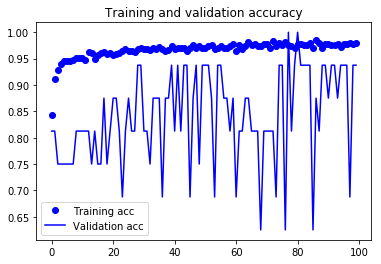

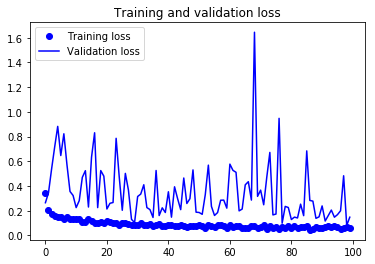

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

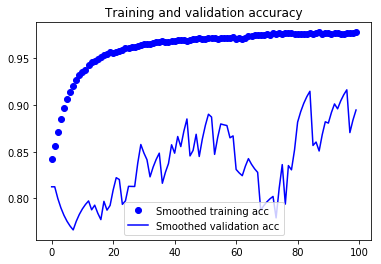

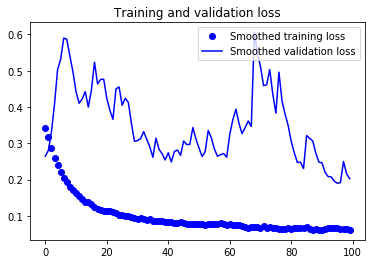

In [52]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 624 images belonging to 2 classes.
('test acc:', 0.9136178767293449)


In [54]:
model.save('FinalAcc.h5')